<a href="https://colab.research.google.com/github/rahulvenkat207/Linear-Algebra-CodingWay/blob/main/Eigenvalues%20and%20Eigenvector/EigenValuesVectors_Notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

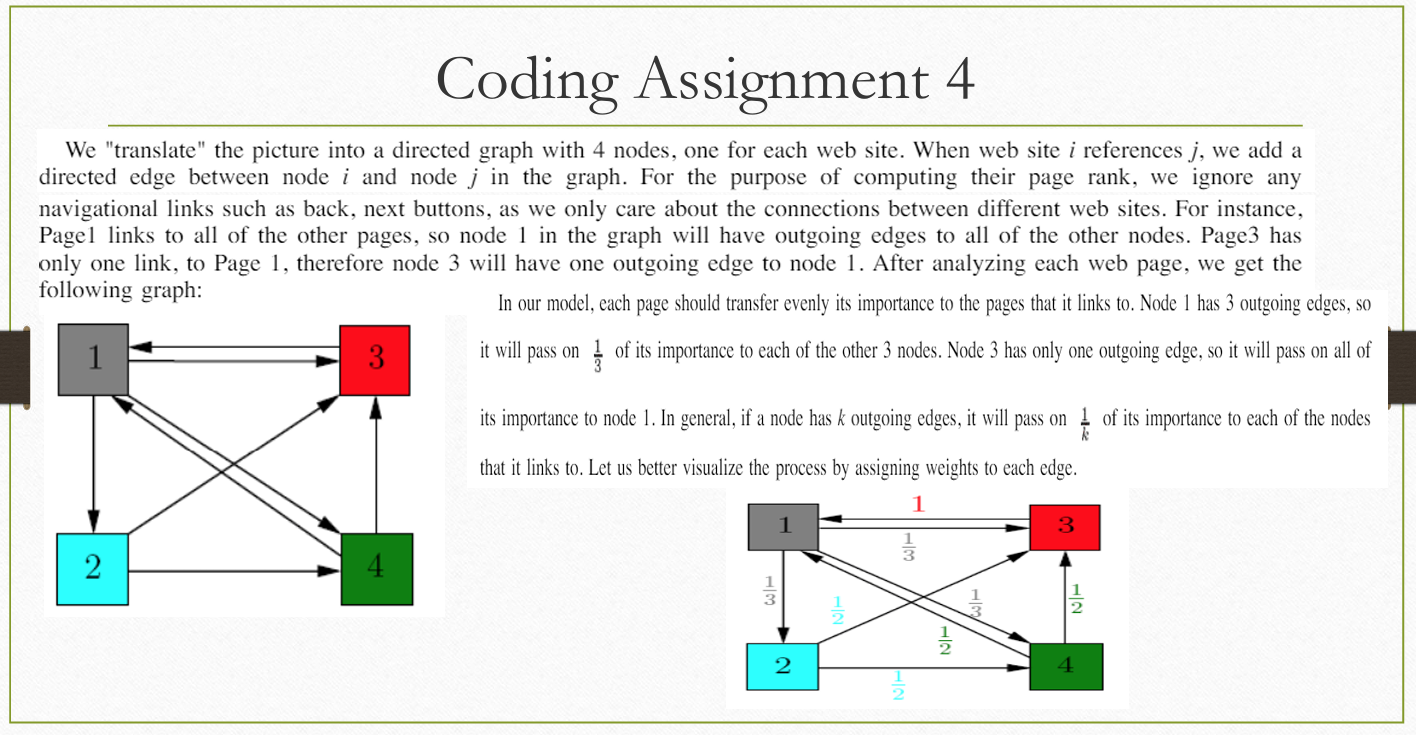

In [79]:
from IPython.display import Image
Image(filename='/content/Screenshot 2024-04-26 142143.png')


## **Problem Statement:**

We are given a list of pages, where each page is linked to one or more other pages.

Formulate the importance of each page as a linear algebra problem.

Verify that the solution to the problem is an EigenVector.

Rescale the Eigen Vector as a probability by making sure sum of all entries in the eigenvector =1.


## **Solution Steps:**
**1)Transition Matrix Generation**:We start by generating a transition matrix based on the given page-link structure. Each element of the matrix represents the probability of transitioning from one page to another.

**2)Eigenvalue and Eigenvector Calculation:**Using the transition matrix, we calculate the eigenvalues and eigenvectors. We identify the eigenvalue closest to 1, as it corresponds to the dominant eigenvector of the transition matrix. This eigenvector represents the steady-state PageRank values, indicating the importance of each page in the network.

**3)Scaling Eigenvector**:We scale the corresponding eigenvector to obtain the PageRank values for each page.

**4)Page Importance Display:**
We display the importance of each page (PageRank) based on the scaled eigenvector. Higher PageRank values indicate greater importance or relevance of the page within the network.

**5)Page Ranking:**
The pages are ranked based on their PageRank scores in descending order. This ranking provides insights into the relative importance of pages within the network, helping prioritize content or resources accordingly.


In [78]:
import numpy as np

## Pages linked to each page

In [64]:
pages = [
    [2, 3, 4],  # Page 1 -> 2-> 3> 4
    [3, 4],     # Page 2 -> 3-> 4
    [1],        # Page 3 ->1
    [1, 3]      # Page 4 -> 1->3
]

## Function to calculate eigenvalues and eigenvector

In [65]:
def calculate_eigen_values_vectors(transition_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
    print("Eigenvalues:")
    print(np.real(eigenvalues))
    print("\nEigenvectors:")
    print(np.real(eigenvectors))
    real_parts = np.real(eigenvalues)
    closest_index = np.argmin(np.abs(real_parts - 1))
    return closest_index

## Function to scale eigenvector

In [66]:
def scale_eigenvector(eigenvector):
    scaled_vector = eigenvector / np.sum(eigenvector)
    print("\nScaled Eigenvector:")
    print(scaled_vector)
    return scaled_vector

## Function to generate transition matrix from pages

In [67]:
def generate_transition_matrix(pages):
    num_pages = len(pages)
    transition_matrix = np.zeros((num_pages, num_pages))
    for i, page_links in enumerate(pages):
        num_links = len(page_links)
        for link in page_links:
            transition_matrix[link - 1, i] = 1 / num_links
    return transition_matrix

## Function to generate equations from pages

In [68]:
def generate_equations(pages):
    equations = []
    for i, page_links in enumerate(pages):
        equation = f"Page{i+1} = "
        num_links = len(page_links)
        for link in page_links:
            equation += f"Page{link}/{num_links} + "
        equation = equation[:-3]  # Remove the last ' + '
        equations.append(equation)
    return equations

## Function to generate matrix from equations

In [69]:
def generate_matrix_from_equations(equations):
    matrix = []
    for equation in equations:
        row = [eval(term.replace('Page', '')) for term in equation.split('=')[1].split('+')]
        matrix.append(row)
    return np.array(matrix)

## Print equations

In [70]:
print("\nEquations:")
equations = generate_equations(pages)
for eq in equations:
    print(eq)


Equations:
Page1 = Page2/3 + Page3/3 + Page4/3
Page2 = Page3/2 + Page4/2
Page3 = Page1/1
Page4 = Page1/2 + Page3/2


## Print the transition matrix

In [71]:
print("Transition Matrix:")
transition_matrix = generate_transition_matrix(pages)
print(transition_matrix)

Transition Matrix:
[[0.         0.         1.         0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.5        0.         0.5       ]
 [0.33333333 0.5        0.         0.        ]]


In [72]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
closest_index = calculate_eigen_values_vectors(transition_matrix)
closest_eigenvalue = np.real(eigenvalues[closest_index])
closest_eigenvector = np.real(eigenvectors[:, closest_index])

Eigenvalues:
[ 1.         -0.36062333 -0.36062333 -0.27875333]

Eigenvectors:
[[ 0.72101012 -0.75521571 -0.75521571  0.50648562]
 [ 0.24033671  0.3036721   0.3036721  -0.60565568]
 [ 0.54075759  0.09315321  0.09315321 -0.38153917]
 [ 0.36050506  0.3583904   0.3583904   0.48070923]]


In [73]:
print(closest_eigenvector)

[0.72101012 0.24033671 0.54075759 0.36050506]


## Scale the eigenvector

In [74]:
scaled_eigenvector = scale_eigenvector(closest_eigenvector)


Scaled Eigenvector:
[0.38709677 0.12903226 0.29032258 0.19354839]


## Display the importance of each page (PageRank)

In [75]:
print("\nImportance of each page (PageRank):")
for i, importance in enumerate(scaled_eigenvector):
    print(f"Page {i+1}: {importance}")


Importance of each page (PageRank):
Page 1: 0.3870967741935484
Page 2: 0.12903225806451615
Page 3: 0.29032258064516114
Page 4: 0.19354838709677427


## Verify sum of PageRank values

In [76]:
print("\nSum of PageRank values:", np.sum(scaled_eigenvector))


Sum of PageRank values: 0.9999999999999999



## Rank pages based on score

In [77]:
ranked_pages = np.argsort(scaled_eigenvector)[::-1] + 1
print("\nRanked pages based on PageRank score:")
for page in ranked_pages:
    print("Page:", page)



Ranked pages based on PageRank score:
Page: 1
Page: 3
Page: 4
Page: 2
